In [11]:
# ---------------------------------------------------------------------------- #
#                          Runge-Kutta 4 Method (RK4)                          #
# ---------------------------------------------------------------------------- #

def funcRK4(t_h,w0,f):
    """Algorithm for solving an ordinary differential equation.
    
    Args:
        t_h (float): constant time step between each iteration 
        w0 (np.ndarray): initial conditions
        f (function): study function
        
    Returns:
        t (np.ndarray): temporal axis
        w (np.ndarray): approximation of the function y(t) 
        and its succesive derivatives over time t.
    """
    nbt = len(t)
    w = np.zeros((nbt,w0.shape[0],w0.shape[1]))
    w[0,:,:] = w0[:,:]
    
    for n in range(1,nbt):
        k1 = f(t[n-1],w[n-1])
        k2 = f(t[n-1]+t_h/2,w[n-1]+t_h/2*k1)
        k3 = f(t[n-1]+t_h/2,w[n-1]+t_h/2*k2)
        k4 = f(t[n-1]+t_h,w[n-1]+t_h*k3)
        w[n] = w[n-1]+t_h/6*(k1+2*k2+2*k3+k4)
    
    return t,w

def f(t, y):
    """Calculates the function and its derivatives (FDTD)

    Args:
        t (float): time for this iteration (not needed for discrete SG equation)
        y (np.ndarray): w of the last iteration

    Returns:
        dy (np.ndarray): function and its succesive derivatives 
        (first derivative for discrete SG equation)
    """
    dy = np.zeros_like(w_init)

    dy[0,:] = y[1,:] 
    for i in np.arange(1,len(x)-1):
        dy[1,i] = B/I*(y[0,i-1]-2*y[0,i]+y[0,i+1])-omega_0**2*np.sin(y[0,i])
    
    dy[:,0] = 0 # first boundary condition (rigid)
    dy[:,-1] = 0 # second boundary condition (rigid)
    # dy[1,-1] = B/I*(y[0,-2]-y[0,-1])-omega_0**2*np.sin(y[0,-1]) # second boundary condition (free)

    return dy

In [12]:
import numpy as np

# ---------------------------------------------------------------------------- #
#                                  Constants                                   #
# ---------------------------------------------------------------------------- #
L = 58.5e-3 # length pendulums [m]
n_pendulums = 110 # number of pendulums
a = 1.35e-2 # spacing between pendulums [m]
xmax = (n_pendulums-1)*a # total length of the spring [m]
g = 9.80665 # gravitational acceleration [m/s²]
B = 4.73e-3 # spring stifness [N/m]
m1=0.4e-3 # mass of a nut [kg]
m2=2.4e-3 # mass of a rod [kg]
m=m2+m1 # total mass [kg]
I=(m1*L**2)/3 + m2*L**2 # moment of inertia [kg m²]
Lp = L*(m2/2+m1)/(m) # distance origin-center of gravity [m]
omega_0 = np.sqrt(m*g*Lp/I) 
c_0 = np.sqrt(a**2*B/I)

# ---------------------------------------------------------------------------- #
#                                   Variables                                  #
# ---------------------------------------------------------------------------- #
u = 0.6 # normalised (betwenn -1 and 1) propragation speed
v = u*c_0
d = c_0/omega_0
t0 = 0 # time lag for the wave [s]
tmax = 10 # animation's duration [s]
t_h = 0.005 # temporal step [s]
t = np.arange(0,tmax,t_h) # time axis
x0 = 0.5 # wave position at time t0 [m]
x = np.arange(0,xmax,a) # spacial axis

# ---------------------------------------------------------------------------- #
#                                     FDTD                                     #
# ---------------------------------------------------------------------------- #

w_init = np.zeros((2, len(x))) # Initial conditions

# ------------------------------ kink plus kink ------------------------------ #
for xx in np.arange(0,len(x)) :
    mu = ((x[xx]-(x0))-v*(t[0]-t0))/(d*np.sqrt(1-(v/c_0)**2))
    mumax = ((x[xx]-(xmax-x0))+v*(t[0]))/(d*np.sqrt(1-(v/c_0)**2))
    w_init[0,xx] = 4*np.arctan(np.exp(mu)) + 4*np.arctan(np.exp(mumax)) 
    w_init[1,xx] = -2*v/((d*np.sqrt(1-(v/c_0)**2))*np.cosh(mu)) + 2*v/((d*np.sqrt(1-(v/c_0)**2))*np.cosh(mumax))

# ---------------------------- kink plus antikink ---------------------------- #
# for xx in np.arange(0,len(x)) :
#     mu = -((x[xx]-(x0))-v*(t[0]-t0))/(d*np.sqrt(1-(v/c_0)**2))
#     mumax = ((x[xx]-(xmax-x0))+v*(t[0]))/(d*np.sqrt(1-(v/c_0)**2))
#     w_init[0,xx] = 4*np.arctan(np.exp(mu)) + 4*np.arctan(np.exp(mumax)) 
#     w_init[1,xx] = 2*v/((d*np.sqrt(1-(v/c_0)**2))*np.cosh(mu)) + 2*v/((d*np.sqrt(1-(v/c_0)**2))*np.cosh(mumax))

# --------------------------- antikink and free end -------------------------- #
# Change the second boundary condition at the end of the first cell
# for xx in np.arange(0,len(x)) :
#     mu = -((x[xx]-(x0))+v*(t[0]-t0))/(d*np.sqrt(1-(v/c_0)**2))
#     w_init[0,xx] = 4*np.arctan(np.exp(mu))
#     w_init[1,xx] = 2*v/((d*np.sqrt(1-(v/c_0)**2))*np.cosh(mu))

# ----------------------------- kink plus static ----------------------------- #
# u1 = u # put u=0!
# v1 = u1*c_0
# u2 = 0.6
# v2 = u2*c_0
# for xx in np.arange(0,len(x)) :
#     mu = ((x[xx]-(xmax-x0))-v1*(t[0]-t0))/(d*np.sqrt(1-(v1/c_0)**2))
#     mumax = ((x[xx]-(x0))-v2*(t[0]))/(d*np.sqrt(1-(v2/c_0)**2))
#     w_init[0,xx] = 4*np.arctan(np.exp(mu)) + 4*np.arctan(np.exp(mumax)) 
#     w_init[1,xx] = -2*v1/((d*np.sqrt(1-(v1/c_0)**2))*np.cosh(mu)) - 2*v2/((d*np.sqrt(1-(v2/c_0)**2))*np.cosh(mumax))

# ------------------------------ Linear impulse ------------------------------ #
# w_init[0,int(len(x)/2)]=np.pi/6 # impulse in the mid of the spring


t_RK4, w_RK4 = funcRK4(t_h,w_init,f)
theta = np.transpose(w_RK4[:,0,:]) # angle to be plotted [rad]

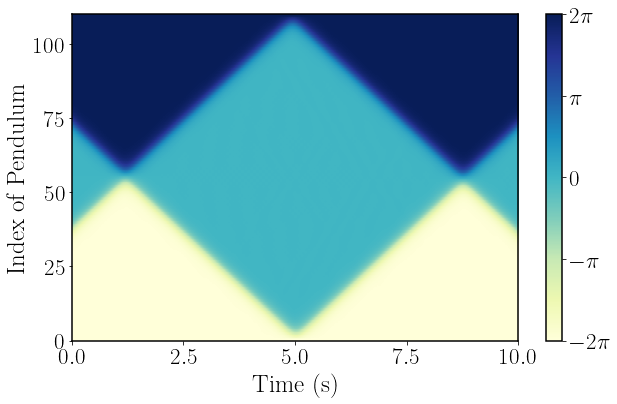

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('lines', linewidth=2)
mpl.rc('font', size=30)
mpl.rc('axes', linewidth=1.5, labelsize=25)
mpl.rc('legend', fontsize=20)
mpl.rc('font',**{'family':'serif','serif':['LM Roman 12']})
mpl.rc('text', usetex=True)

fig = plt.figure(figsize=(10,6))

plt.imshow(theta,origin='lower',extent=[0,tmax,0,n_pendulums], vmin=0, vmax=4*np.pi, cmap='YlGnBu', aspect='auto')
cbar=plt.colorbar()#extend='both')

# for solitons: vmin=0, vmax=4*np.pi
cbar.set_ticks([0,np.pi,2*np.pi,np.pi*3,np.pi*4])
cbar.set_ticklabels(["$-2\pi$","$-\pi$","$0$","$\pi$","$2\pi$"],fontweight='bold', fontsize=23)

# for linear impulse: vmin=-np.pi/20, vmax=np.pi/20
# cbar.set_ticks([-np.pi/24,-np.pi/48,0,np.pi/48,np.pi/24])
# cbar.set_ticklabels(["$-\pi/24$","$-\pi/48$","$0$","$-\pi/48$","$\pi/24$"])

plt.xticks(fontsize=23)
plt.yticks(fontsize=23)

plt.xlabel("Time (s)",fontweight='bold', fontsize=25)
plt.ylabel("Index of Pendulum",fontweight='bold', fontsize=25)

# plt.savefig('imshow.pdf',bbox_inches='tight')
plt.show()